In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sb
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
from sklearn import preprocessing

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
file_1 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/jedit-4.2.csv'
file_2 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/nieruchomosci.csv'
file_3 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/xalan-2.7.csv'
file_4 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/xerces-1.4.csv'
file_5 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/velocity-1.6.csv'
file_6 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/tomcat.csv'
file_7 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/log4j-1.2.csv'
file_8 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/ivy-2.0.csv'
file_9 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/ant-1.7.csv'
file_10 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/arc.csv'
file_11 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/camel-1.6.csv'
file_12 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/berek.csv'
file_13 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/ckjm.csv'
file_14 = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/lucene-2.0.csv'

df1 = pd.read_csv(file_1)
df2 = pd.read_csv(file_2)
df3 = pd.read_csv(file_3)
df4 = pd.read_csv(file_4)
df5 = pd.read_csv(file_5)
df6 = pd.read_csv(file_6)
df7 = pd.read_csv(file_7)
df8 = pd.read_csv(file_8)
df9 = pd.read_csv(file_9)
df10 = pd.read_csv(file_10)
df11 = pd.read_csv(file_11)
df12 = pd.read_csv(file_12)
df13 = pd.read_csv(file_13)
df14 = pd.read_csv(file_14)

In [4]:
df1.head()
print("Data set has %d observations and %d features" % (df1.shape[0], df1.shape[1]))

Data set has 367 observations and 24 features


In [5]:
full = df1.append([df2,df3,df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14],  ignore_index=True)
print("Data set now has %d observations and %d features" % (full.shape[0], full.shape[1]))

Data set now has 5727 observations and 24 features


In [6]:
# Check for missing data
print("%s\n" % (full.isnull().sum()))

# Lets ensure that all columns are of the expected type object and int (or float)
print("\n%s\n" % (full.dtypes))
#full.to_csv('/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/full_metrics_bugs.csv')

name       0
version    0
name.1     0
wmc        0
dit        0
noc        0
cbo        0
rfc        0
lcom       0
ca         0
ce         0
npm        0
lcom3      0
loc        0
dam        0
moa        0
mfa        0
cam        0
ic         0
cbm        0
amc        0
max_cc     0
avg_cc     0
bug        0
dtype: int64


name        object
version     object
name.1      object
wmc          int64
dit          int64
noc          int64
cbo          int64
rfc          int64
lcom         int64
ca           int64
ce           int64
npm          int64
lcom3      float64
loc          int64
dam        float64
moa          int64
mfa        float64
cam        float64
ic           int64
cbm          int64
amc        float64
max_cc       int64
avg_cc     float64
bug          int64
dtype: object



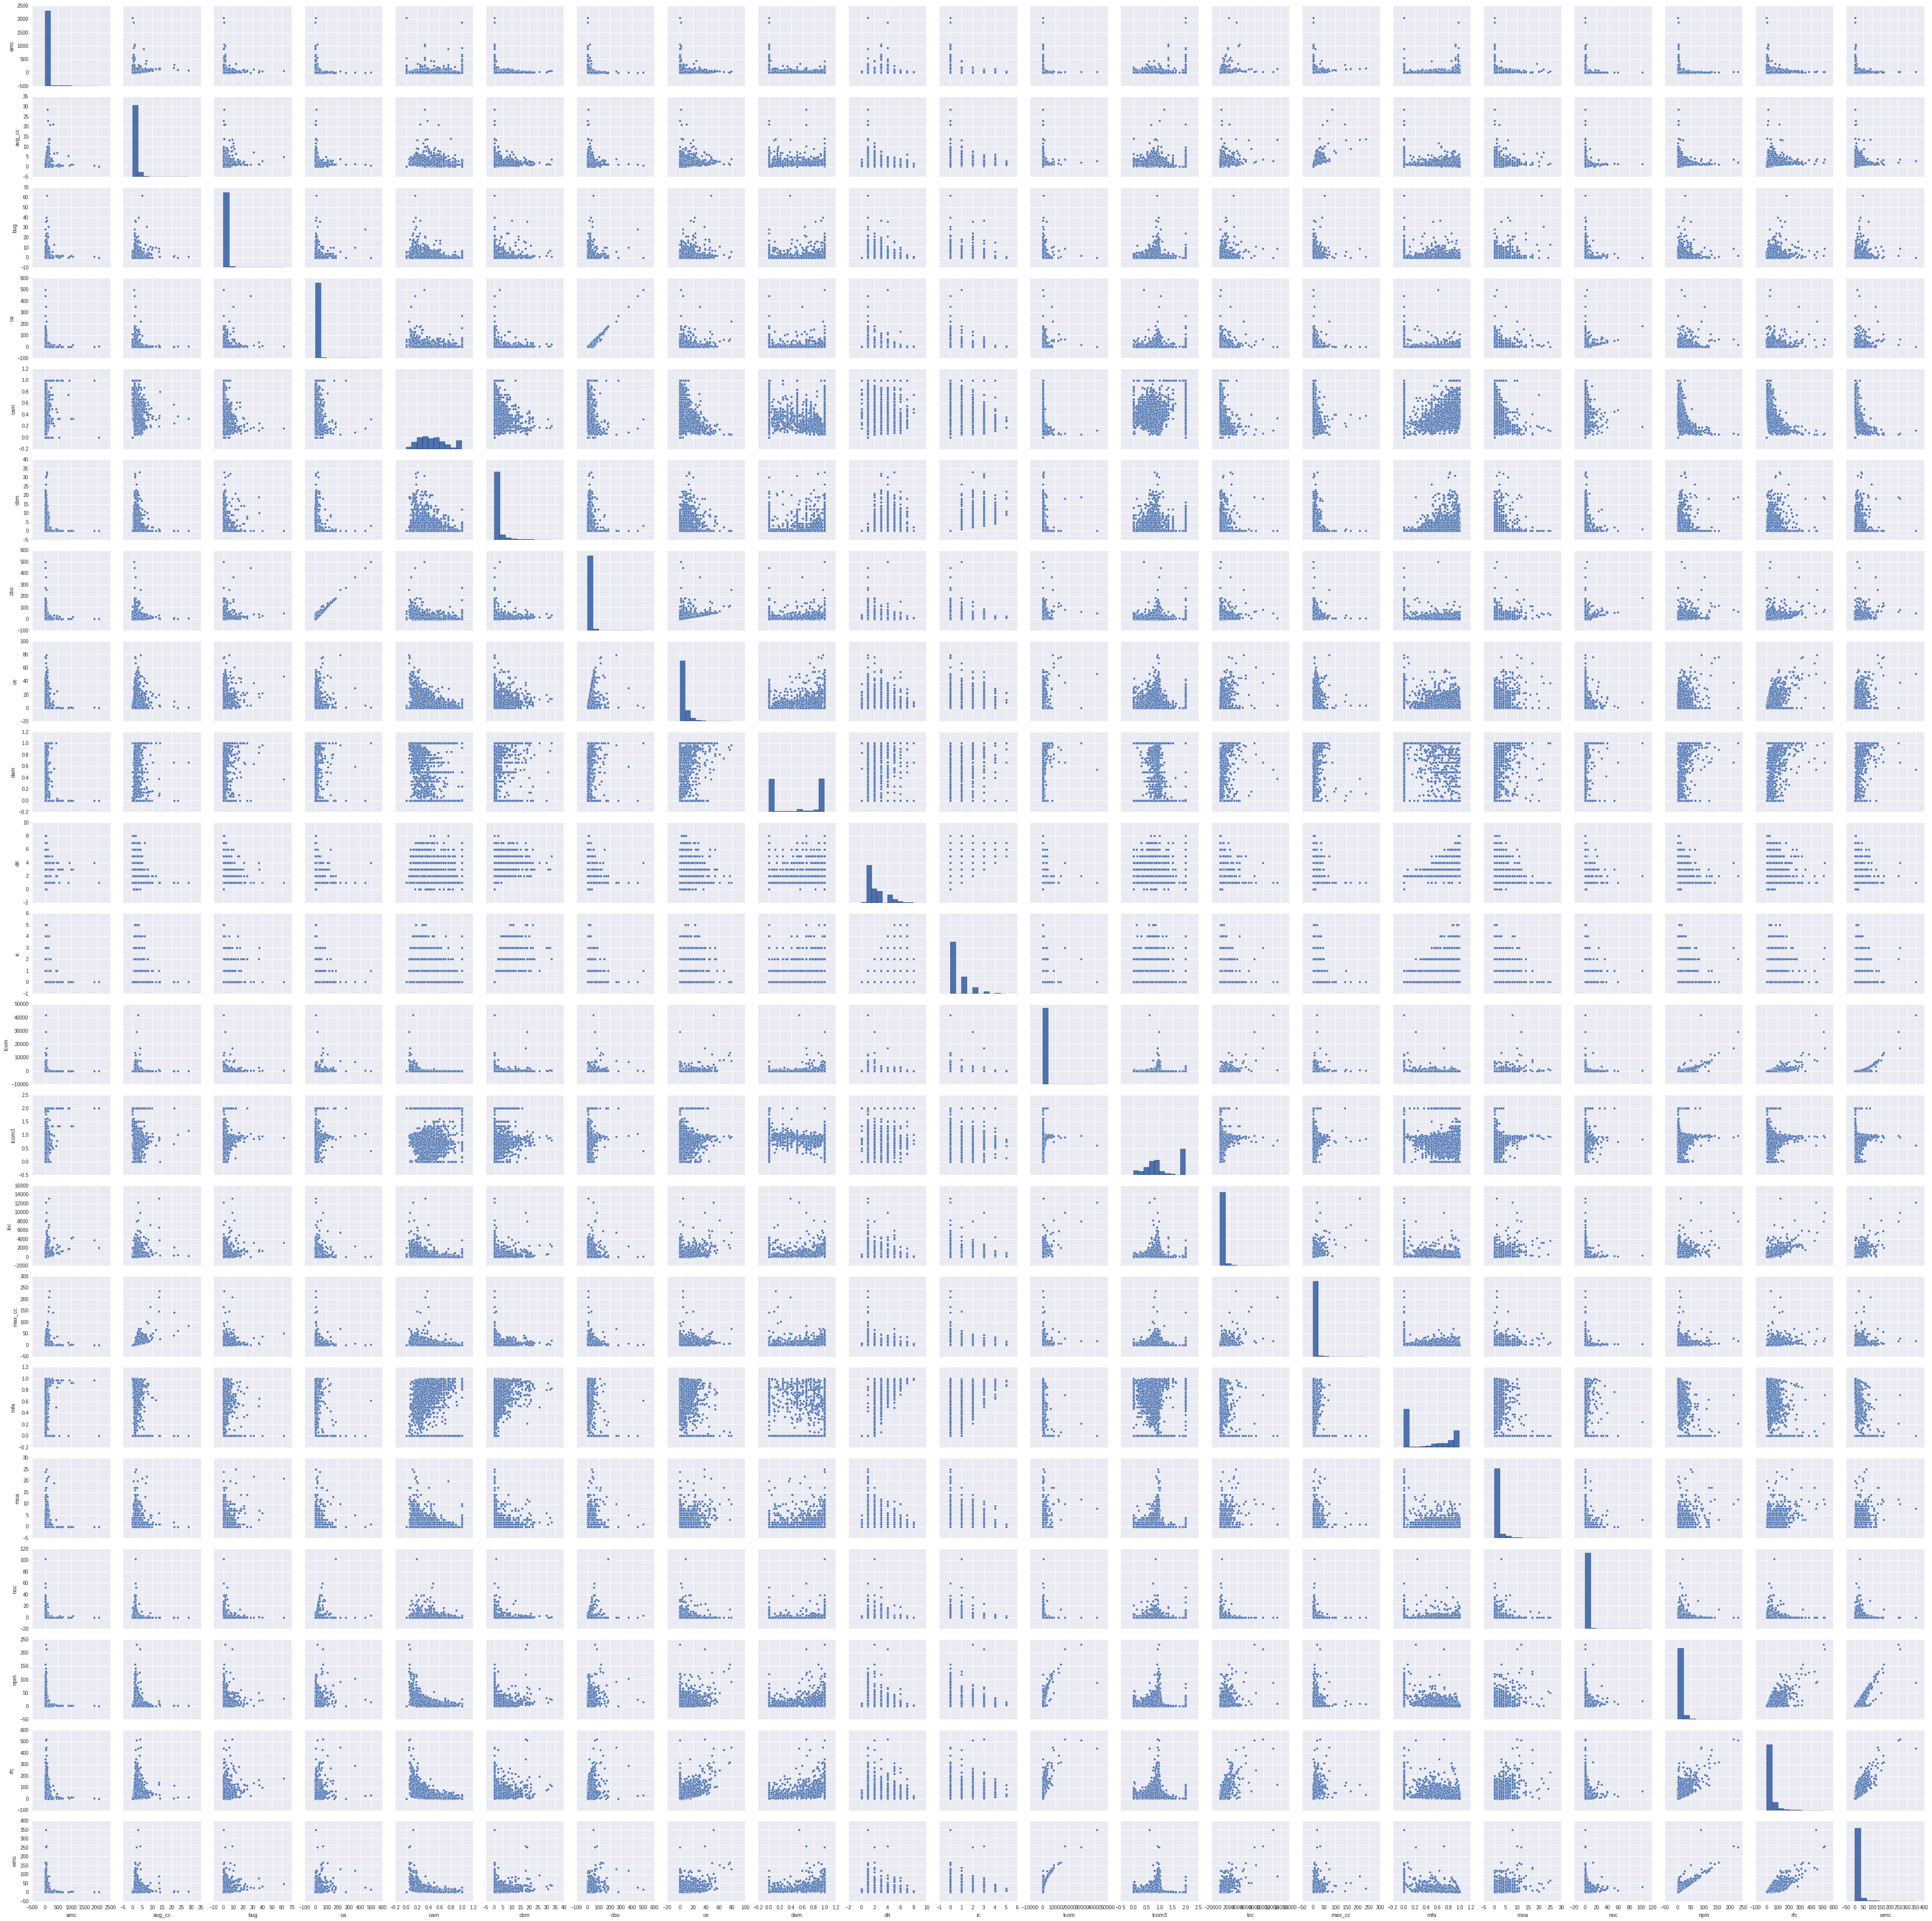

In [7]:
exclude = ['name', 'version', 'name.1']
data_for_plotting = full.ix[:, full.columns.difference(exclude)] 
__ = sb.pairplot(data_for_plotting)

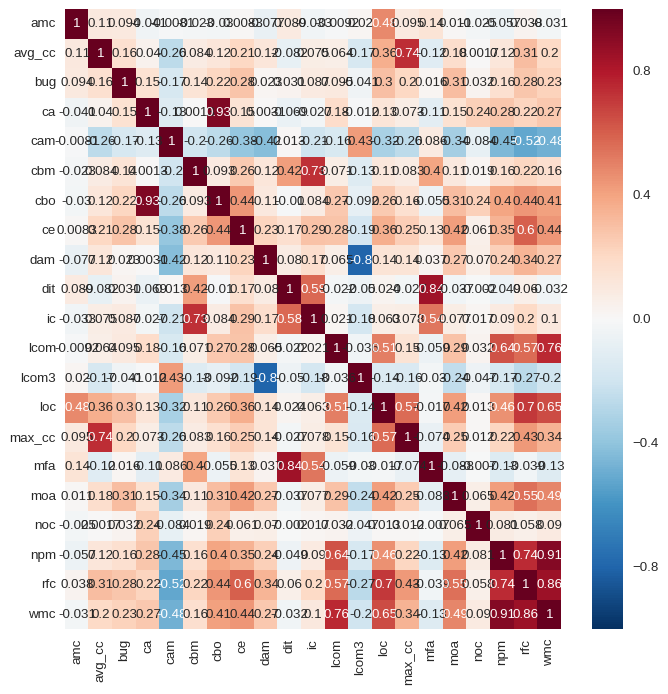

In [8]:
corr = full.ix[:, full.columns.difference(exclude)].corr()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__  = sb.heatmap(corr, annot=True)

## 1 - Weighted Methods per Class
The value of the WMC is equal  to  the  number  of  methods  in  the  class  (assuming  unity weights for all methods)

count    5727.000000
mean       10.638903
std        15.238981
min         0.000000
25%         3.000000
50%         6.000000
75%        12.000000
max       351.000000
Name: wmc, dtype: float64

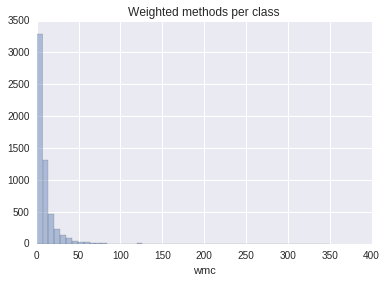

In [9]:
sb.distplot(full.wmc, kde=False)
__ = plt.title('Weighted methods per class')
full.wmc.describe()

### Transformation and scaling

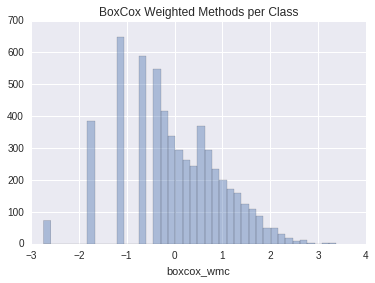

In [10]:
full['boxcox_wmc'] = preprocessing.scale(boxcox(full.wmc + 1) [0])
sb.distplot(full.boxcox_wmc, kde=False)
__ = plt.title('BoxCox Weighted Methods per Class')

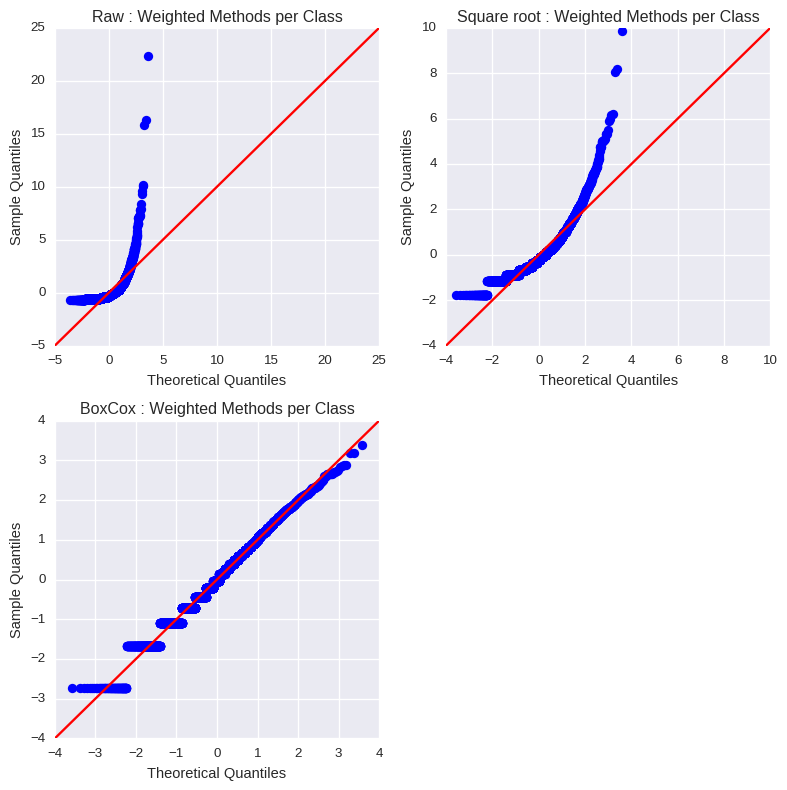

In [11]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.wmc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Weighted Methods per Class')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.wmc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Weighted Methods per Class')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_wmc, line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Weighted Methods per Class')
plt.tight_layout()

## 2 - Depth of Inheritance Tree
The number of class definitions from  the top of the class hierarchy to the leaf.

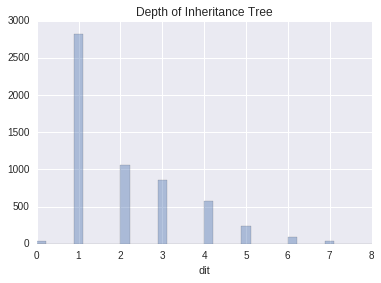

In [12]:
sb.distplot(full.dit, kde=False)
__ = plt.title('Depth of Inheritance Tree')

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


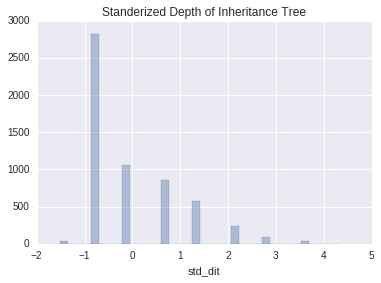

In [13]:
full['std_dit'] = preprocessing.scale(full.dit)
sb.distplot(full.std_dit, kde=False)
__ = plt.title('Standerized Depth of Inheritance Tree')

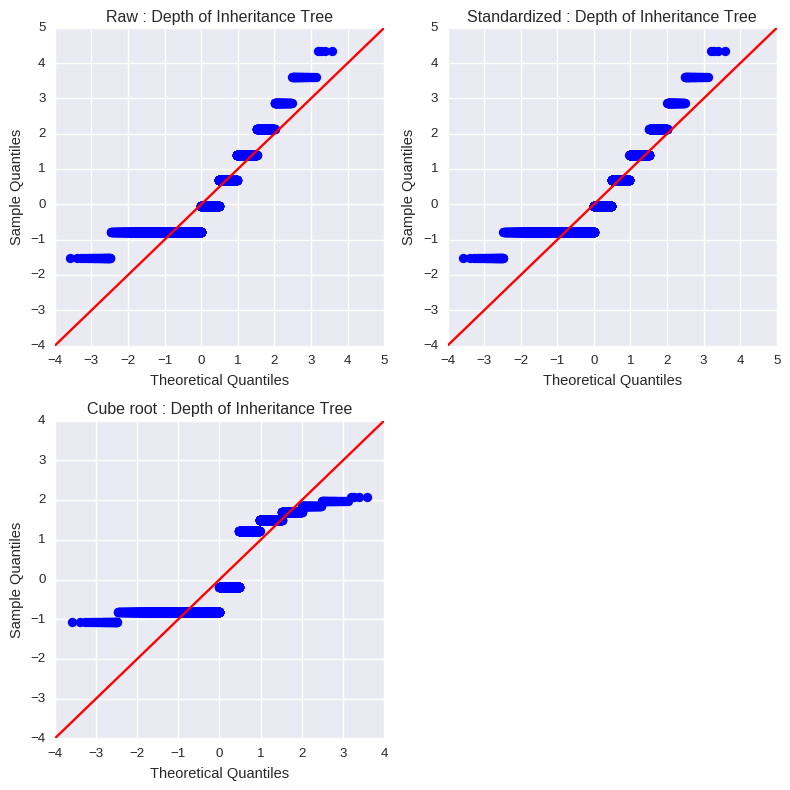

In [14]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.dit, line='45', fit=True, ax=ax)
ax.set_title('Raw : Depth of Inheritance Tree')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(full.std_dit, line='45', fit=True, ax=ax)
ax.set_title('Standardized : Depth of Inheritance Tree')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(full.std_dit), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Depth of Inheritance Tree')
plt.tight_layout()

## 3 - Number of Children 
The number of immediate descendants of the class under question.

count    5727.000000
mean        0.470578
std         2.749807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       102.000000
Name: noc, dtype: float64

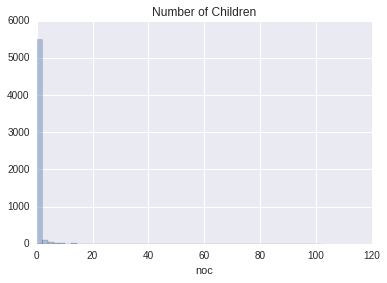

In [15]:
sb.distplot(full.noc, kde=False)
__ = plt.title('Number of Children')
full.noc.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


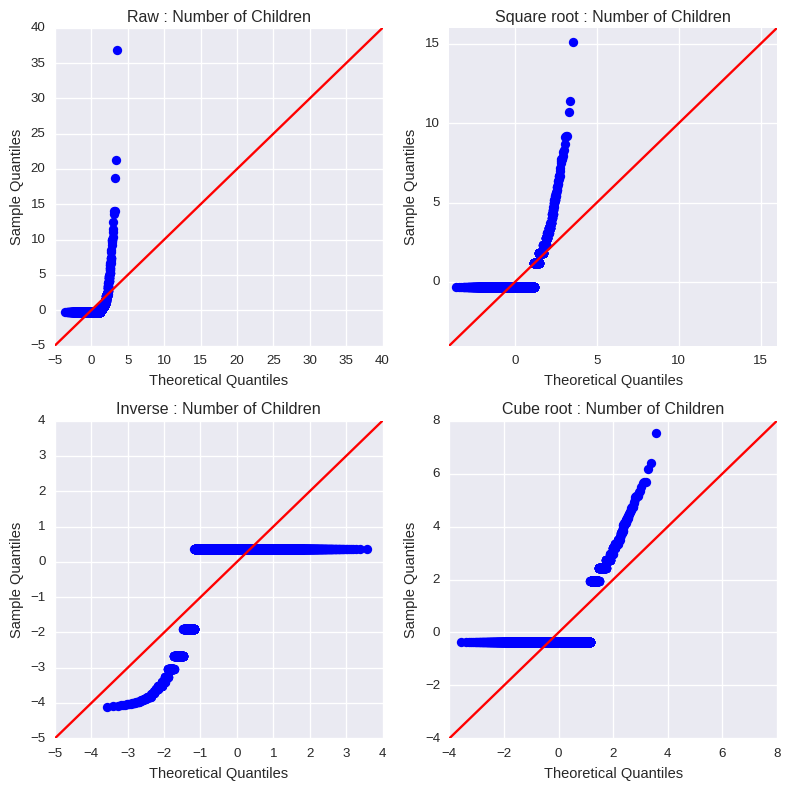

In [16]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.noc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Children')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.noc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Children')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(1/(full.noc + 1), line='45', fit=True, ax=ax)
ax.set_title('Inverse : Number of Children')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.noc)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Children')
plt.tight_layout()

# use cube root scaled version
full['cbrt_noc'] = np.cbrt(preprocessing.scale(full.noc))

## 4 - Coupling between classes
Represents   the   number   of   classes   coupled   to   a   given   class   (efferent  couplings  and  afferent  couplings). These  couplings  can  occur  through  method  calls, field  accesses,  inheritance,  method  arguments, return types, and exceptions. 

count    5727.000000
mean       10.165008
std        17.975374
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       499.000000
Name: cbo, dtype: float64

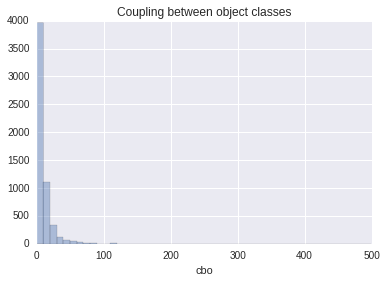

In [17]:
sb.distplot(full.cbo, kde=False)
__ = plt.title('Coupling between object classes')
full.cbo.describe()

### Transformation and scaling

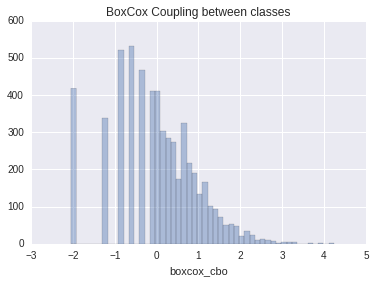

In [18]:
full['boxcox_cbo'] = preprocessing.scale(boxcox(full.cbo + 1) [0])
sb.distplot(full.boxcox_cbo, kde=False)
__ = plt.title('BoxCox Coupling between classes')

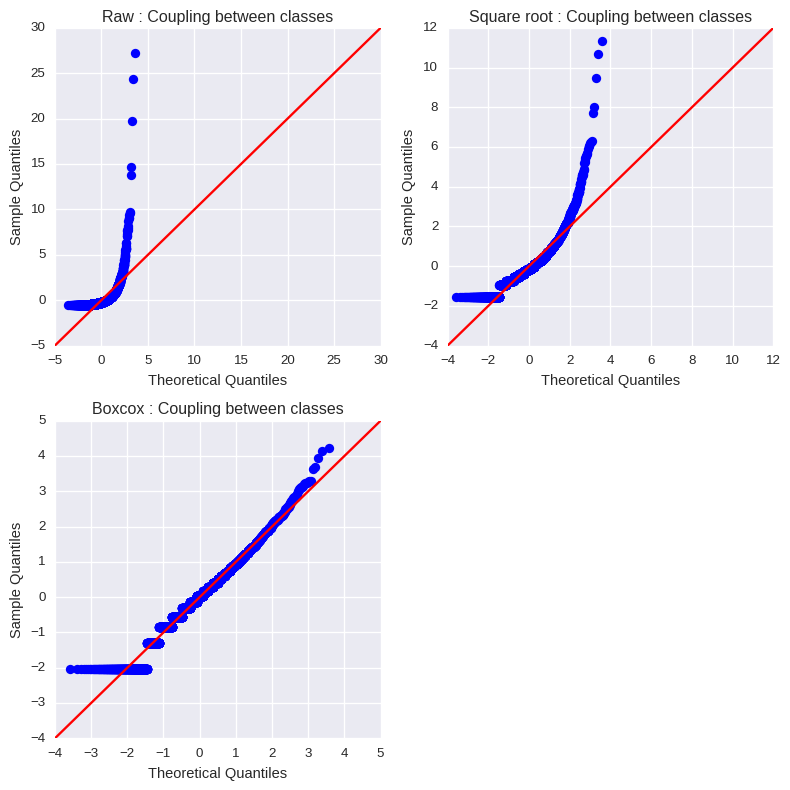

In [19]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.cbo, line='45', fit=True, ax=ax)
ax.set_title('Raw : Coupling between classes')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.cbo), line='45', fit=True, ax=ax)
ax.set_title('Square root : Coupling between classes')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_cbo, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Coupling between classes')
plt.tight_layout()

## 5 - Response for a Class
Measures the number of different methods that can be executed when an instance of that class has an interface method invoked.
Transitive closure of the method call graph.

count    5727.000000
mean       28.465514
std        37.424603
min         0.000000
25%         7.000000
50%        17.000000
75%        35.000000
max       522.000000
Name: rfc, dtype: float64

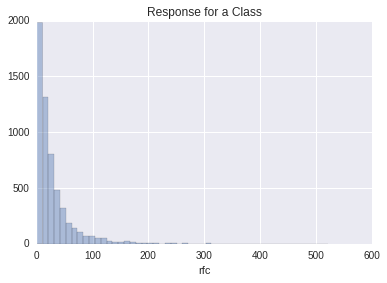

In [20]:
sb.distplot(full.rfc, kde=False)
__ = plt.title('Response for a Class')
full.rfc.describe()

### Transformation and scaling

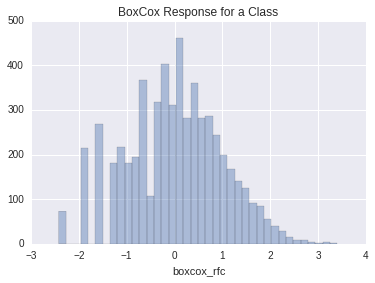

In [21]:
full['boxcox_rfc'] = preprocessing.scale(boxcox(full.rfc + 1) [0])
sb.distplot(full.boxcox_rfc, kde=False)
__ = plt.title('BoxCox Response for a Class')

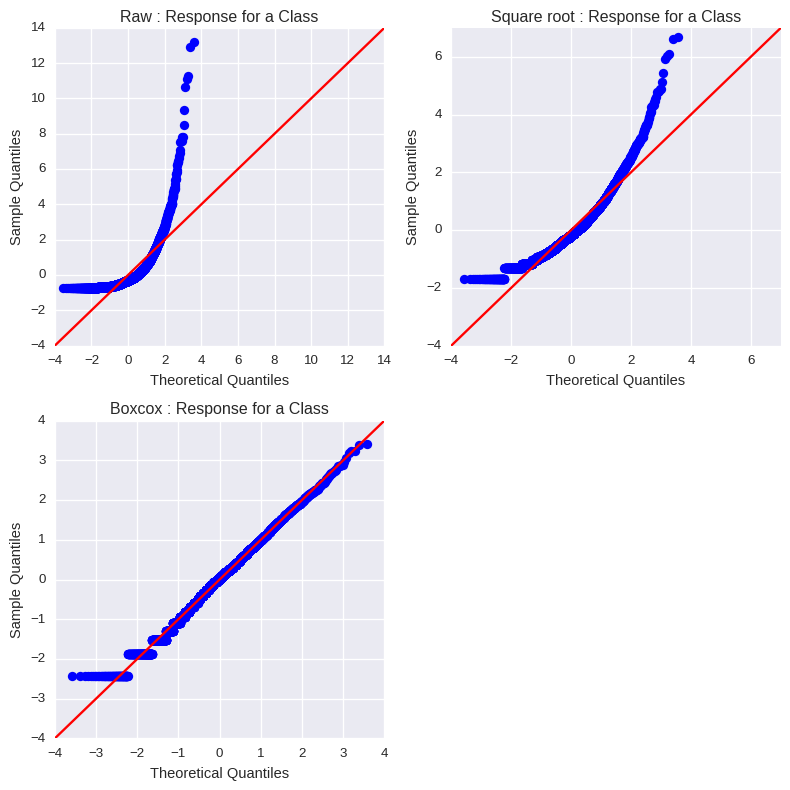

In [22]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.rfc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Response for a Class')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.rfc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Response for a Class')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_rfc, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Response for a Class')
plt.tight_layout()

## 6 - Lack of Cohesion in Methods
Counts the sets of methods in a class that are not related through the sharing of some of the class attributes.

count     5727.000000
mean       117.767068
std        881.850762
min          0.000000
25%          0.000000
50%          5.000000
75%         36.000000
max      41713.000000
Name: lcom, dtype: float64

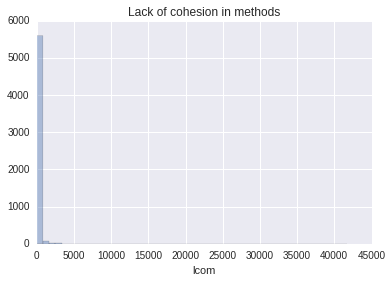

In [23]:
sb.distplot(full.lcom, kde=False)
__ = plt.title('Lack of cohesion in methods')
full.lcom.describe()

### Transformation and scaling

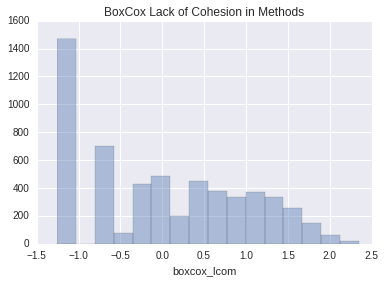

In [24]:
full['boxcox_lcom'] = preprocessing.scale(boxcox(full.lcom + 1) [0])
sb.distplot(full.boxcox_lcom, kde=False)
__ = plt.title('BoxCox Lack of Cohesion in Methods')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


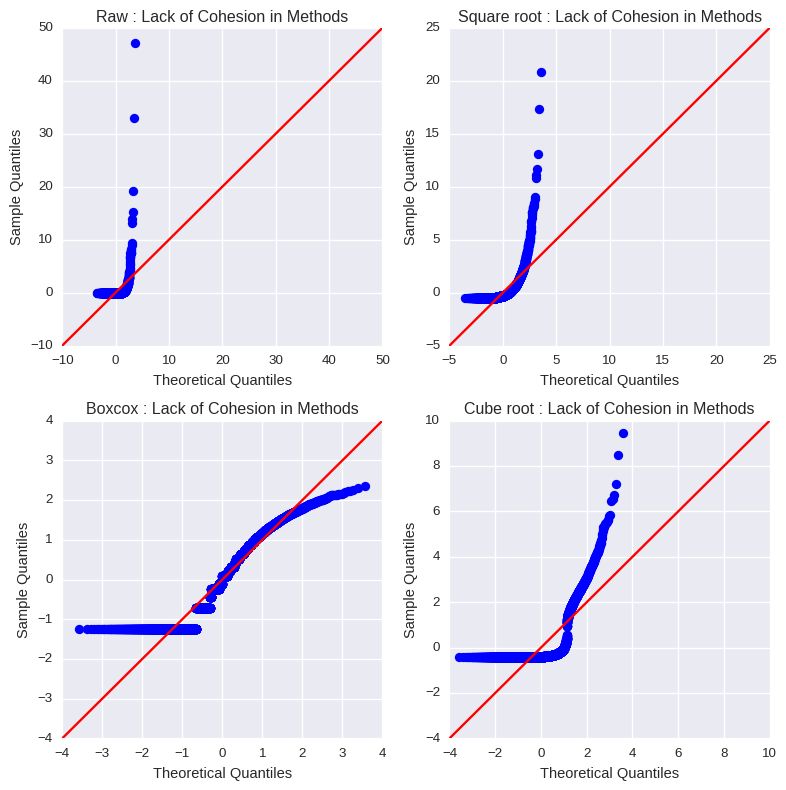

In [25]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.lcom, line='45', fit=True, ax=ax)
ax.set_title('Raw : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.lcom), line='45', fit=True, ax=ax)
ax.set_title('Square root : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_lcom, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.lcom)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Lack of Cohesion in Methods')

plt.tight_layout()

## 7 - Lack of Cohesion 3

count    5727.000000
mean        1.137952
std         0.669385
min         0.000000
25%         0.666667
50%         0.896667
75%         2.000000
max         2.000000
Name: lcom3, dtype: float64

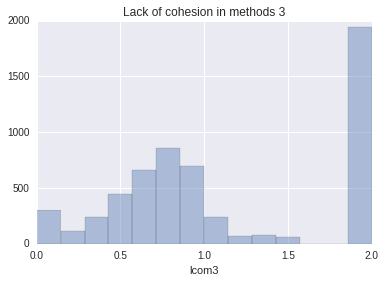

In [26]:
sb.distplot(full.lcom3, kde=False)
__ = plt.title('Lack of cohesion in methods 3')
full.lcom3.describe()

### Transformation and scaling

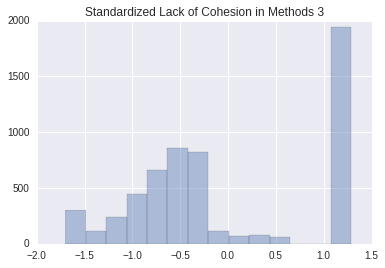

In [29]:
sb.distplot(preprocessing.scale(full.lcom3), kde=False)
__ = plt.title('Standardized Lack of Cohesion in Methods 3')

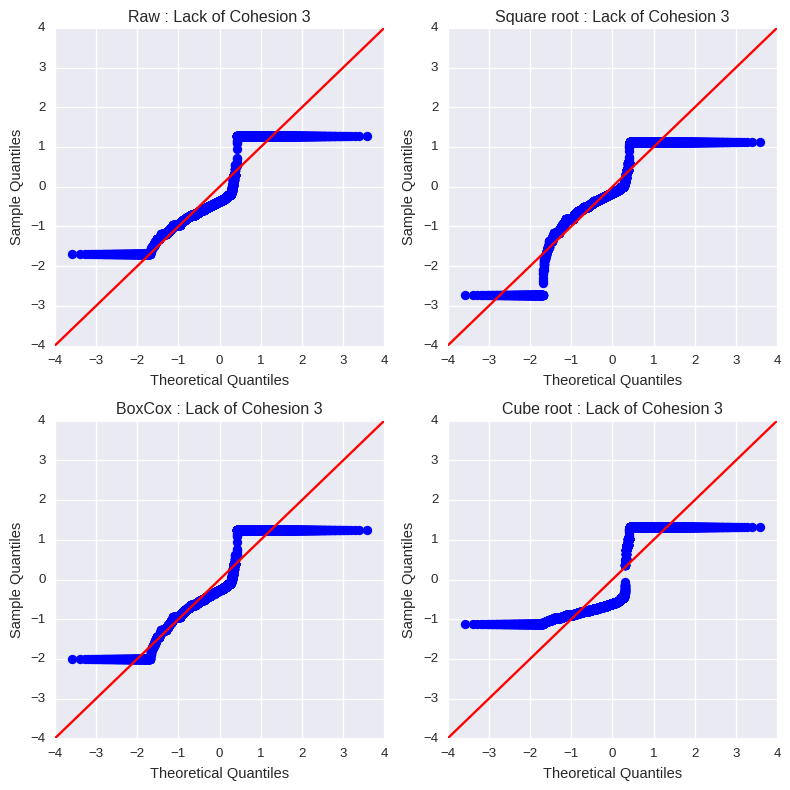

In [30]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.lcom3, line='45', fit=True, ax=ax)
ax.set_title('Raw : Lack of Cohesion 3')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.lcom3), line='45', fit=True, ax=ax)
ax.set_title('Square root : Lack of Cohesion 3')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.lcom3 + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Lack of Cohesion 3')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.lcom3)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Lack of Cohesion 3')

plt.tight_layout()

# use BoxCox version
full['boxcox_lcom3'] = preprocessing.scale(boxcox(full.lcom3 + 1) [0])

## 8 - Number of Public Methods
The methods in a class that are declared as public. The metric is known also as Class Interface Size (CIS) 

count    5727.000000
mean        8.285315
std        12.257696
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max       231.000000
Name: npm, dtype: float64

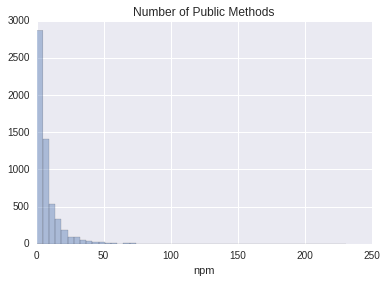

In [31]:
sb.distplot(full.npm, kde=False)
__ = plt.title('Number of Public Methods')
full.npm.describe()

### Transformation and scaling

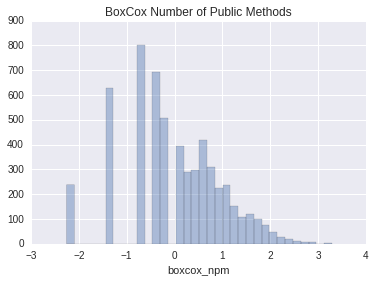

In [32]:
full['boxcox_npm'] = preprocessing.scale(boxcox(full.npm + 1) [0])
sb.distplot(full.boxcox_npm, kde=False)
__ = plt.title('BoxCox Number of Public Methods')

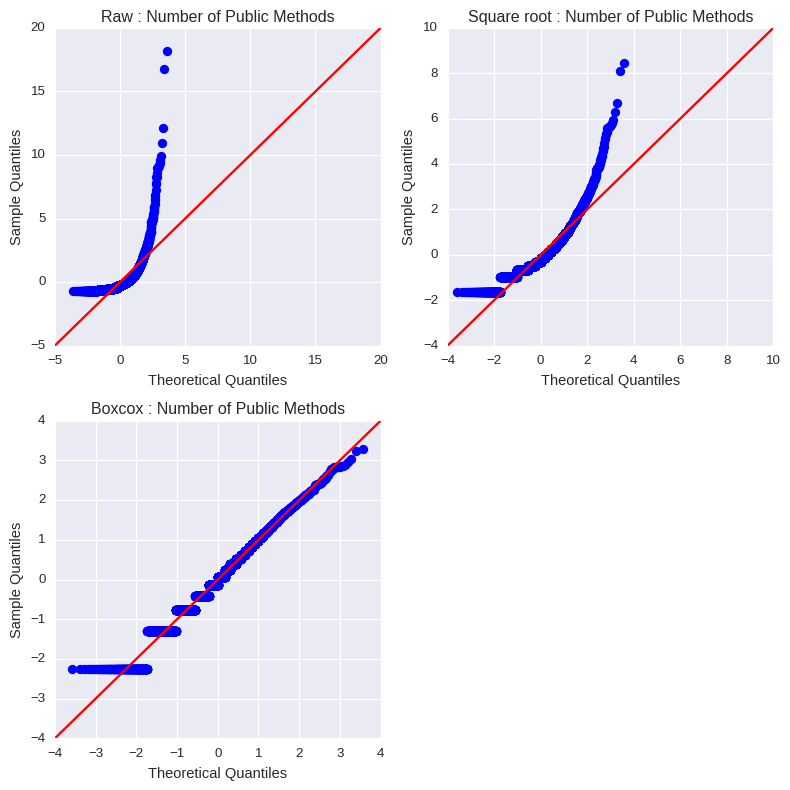

In [33]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.npm, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Public Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.npm), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Public Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_npm, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Number of Public Methods')
plt.tight_layout()

## 9 - Inheritance Coupling
The  number  of  parent  classes  to  which  a  given  class  is  coupled.

count    5727.000000
mean        0.474769
std         0.799723
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: ic, dtype: float64

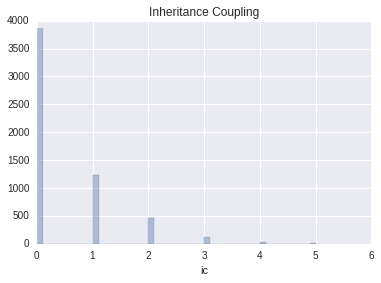

In [34]:
sb.distplot(full.ic, kde=False)
__ = plt.title('Inheritance Coupling')
full.ic.describe()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


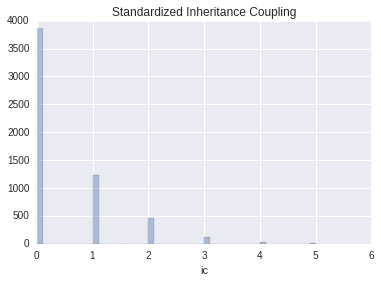

In [35]:
full['std_ic'] = preprocessing.scale(full.ic)
sb.distplot(full.ic, kde=False)
__ = plt.title('Standardized Inheritance Coupling')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


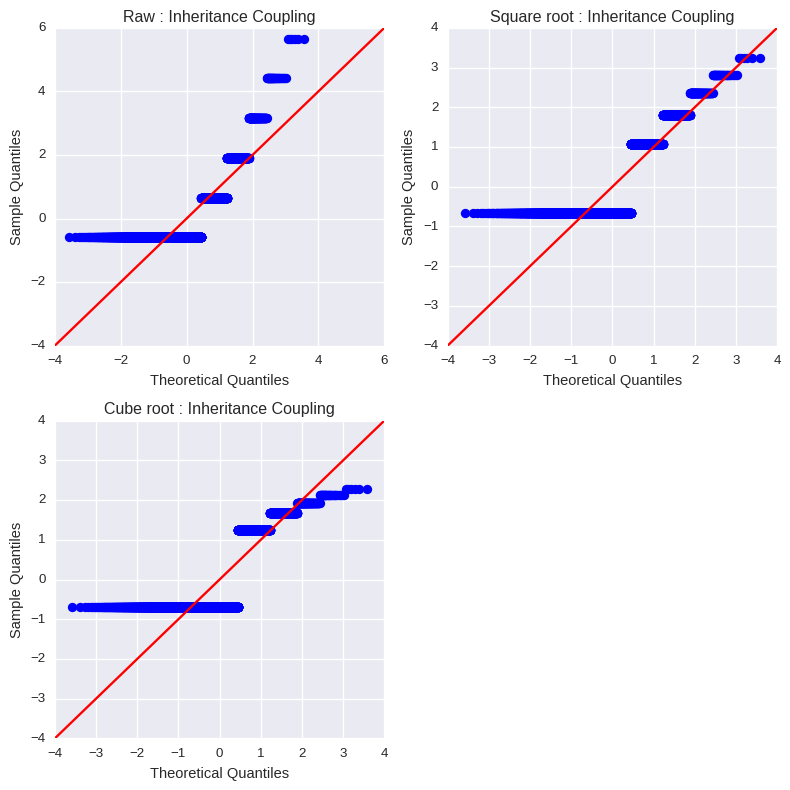

In [36]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.ic, line='45', fit=True, ax=ax)
ax.set_title('Raw : Inheritance Coupling')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.ic), line='45', fit=True, ax=ax)
ax.set_title('Square root : Inheritance Coupling')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.ic)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Inheritance Coupling')

plt.tight_layout()

## 10 - Measure of Functional Abstraction
The ratio of the number of methods inherited by a class to the total number of methods accessible by the member methods of the class.  

count    5727.000000
mean        0.401383
std         0.422828
min         0.000000
25%         0.000000
50%         0.142857
75%         0.869565
max         1.000000
Name: mfa, dtype: float64

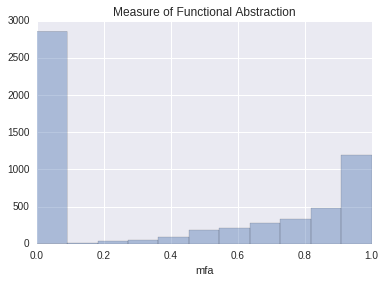

In [54]:
sb.distplot(full.mfa, kde=False)
__ = plt.title('Measure of Functional Abstraction')
full.mfa.describe()

### Transformation and scaling

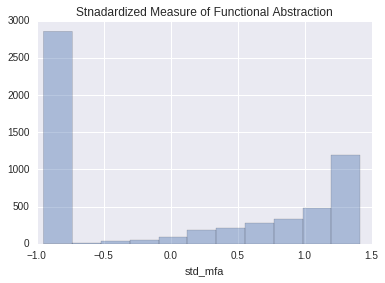

In [55]:
full['std_mfa'] = preprocessing.scale(full.mfa) 
sb.distplot(full.std_mfa, kde=False)
__ = plt.title('Stnadardized Measure of Functional Abstraction')

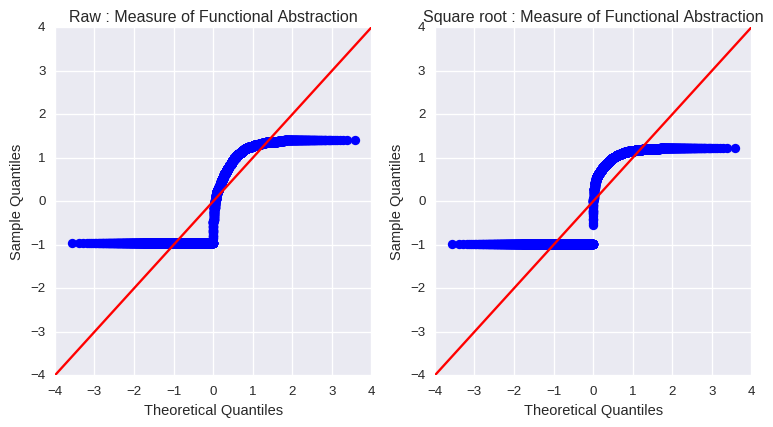

In [37]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.mfa, line='45', fit=True, ax=ax)
ax.set_title('Raw : Measure of Functional Abstraction')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.mfa), line='45', fit=True, ax=ax)
ax.set_title('Square root : Measure of Functional Abstraction')
plt.tight_layout()

## 11 - Average Method Complexity
This metric measures the average method size for each class.

count    5727.000000
mean       29.571061
std        86.366464
min         0.000000
25%         5.000000
50%        13.000000
75%        27.195238
max      2052.000000
Name: amc, dtype: float64

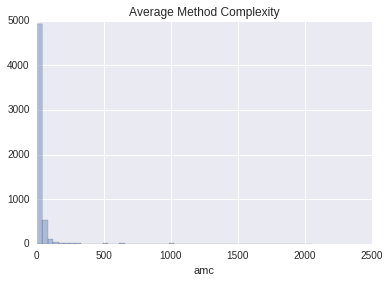

In [38]:
sb.distplot(full.amc, kde=False)
__ = plt.title('Average Method Complexity')
full.amc.describe()

### Transformation and scaling

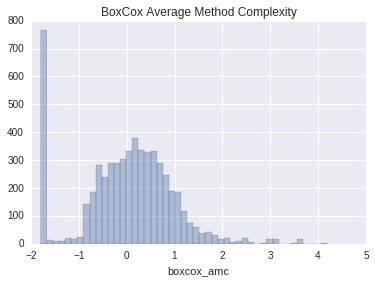

In [39]:
full['boxcox_amc'] = preprocessing.scale(boxcox(full.amc + 1) [0])
sb.distplot(full.boxcox_amc, kde=False)
__ = plt.title('BoxCox Average Method Complexity')

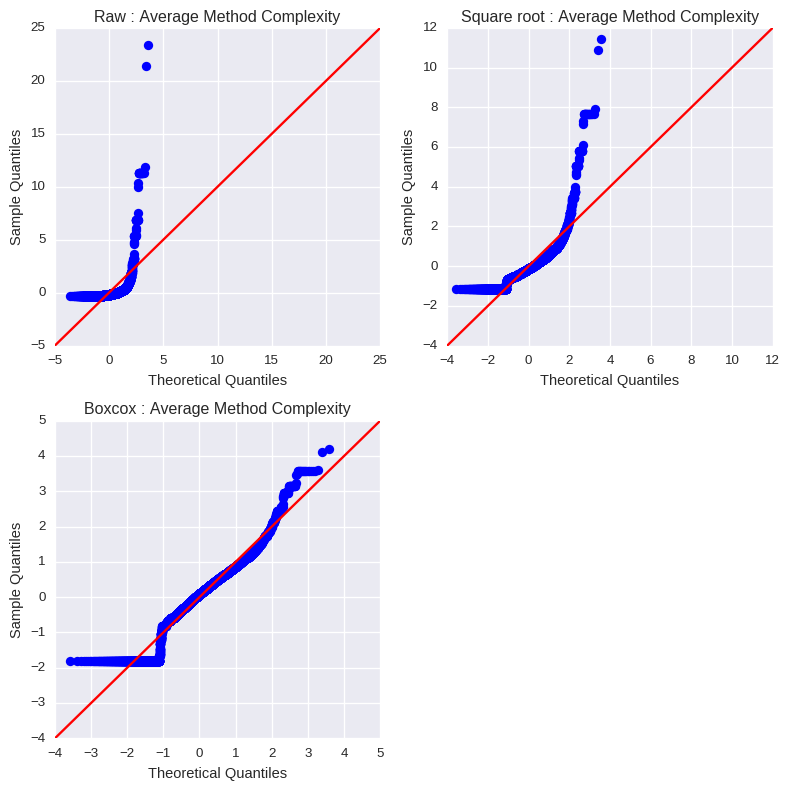

In [40]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.amc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Average Method Complexity')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.amc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Average Method Complexity')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_amc, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Average Method Complexity')
plt.tight_layout()

## 12 - Afferent couplings 
The number of classes that depend upon the measured class. 

count    5727.000000
mean        5.182120
std        16.405111
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       498.000000
Name: ca, dtype: float64

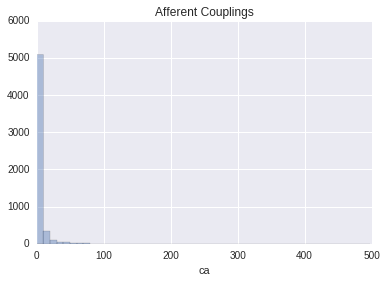

In [41]:
sb.distplot(full.ca, kde=False)
__ = plt.title('Afferent Couplings')
full.ca.describe()

### Transformation and scaling

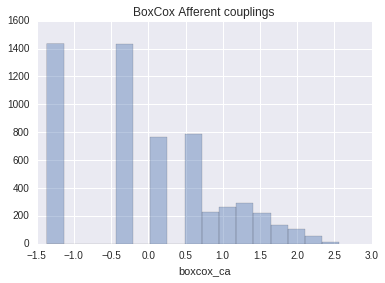

In [42]:
full['boxcox_ca'] = preprocessing.scale(boxcox(full.ca + 1) [0])
sb.distplot(full.boxcox_ca, kde=False)
__ = plt.title('BoxCox Afferent couplings')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


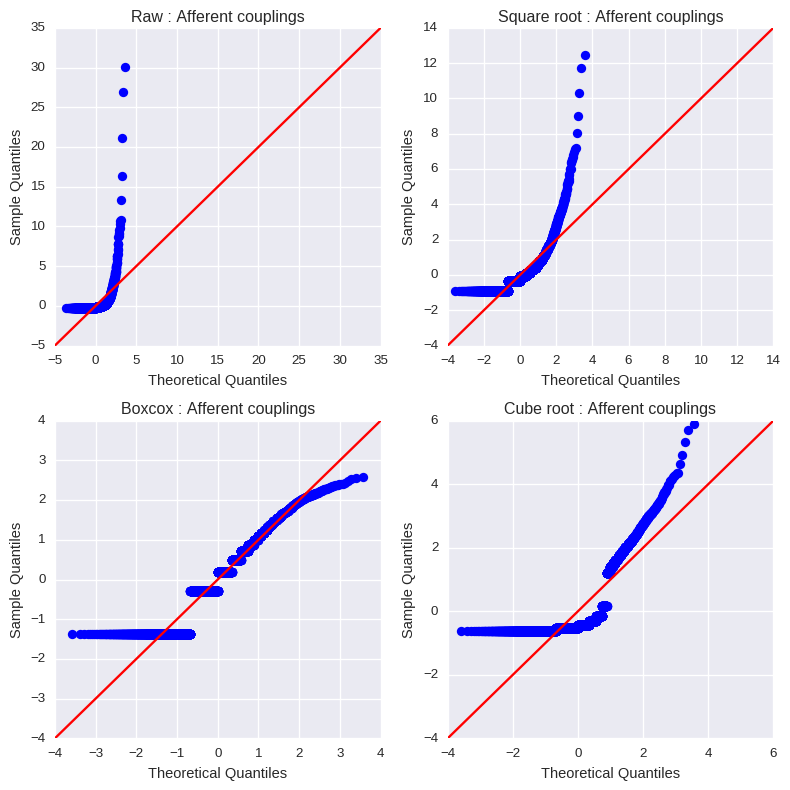

In [43]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.ca, line='45', fit=True, ax=ax)
ax.set_title('Raw : Afferent couplings')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.ca), line='45', fit=True, ax=ax)
ax.set_title('Square root : Afferent couplings')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_ca, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Afferent couplings')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.ca)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Afferent couplings')
plt.tight_layout()

## 13 - Efferent couplings 
The number of classes that the measured class is depended upon. 

count    5727.000000
mean        4.846517
std         7.099440
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        79.000000
Name: ce, dtype: float64

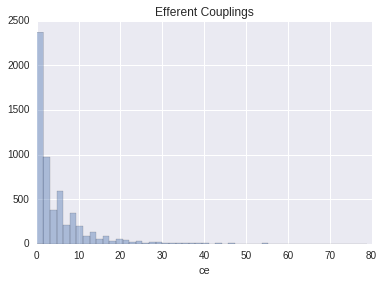

In [45]:
sb.distplot(full.ce, kde=False)
__ = plt.title('Efferent Couplings')
full.ce.describe()

### Transformation and scaling

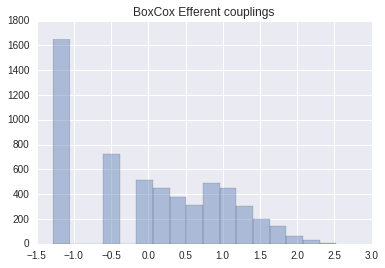

In [46]:
sb.distplot(preprocessing.scale(boxcox(full.ce + 1) [0]), kde=False)
__ = plt.title('BoxCox Efferent couplings')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


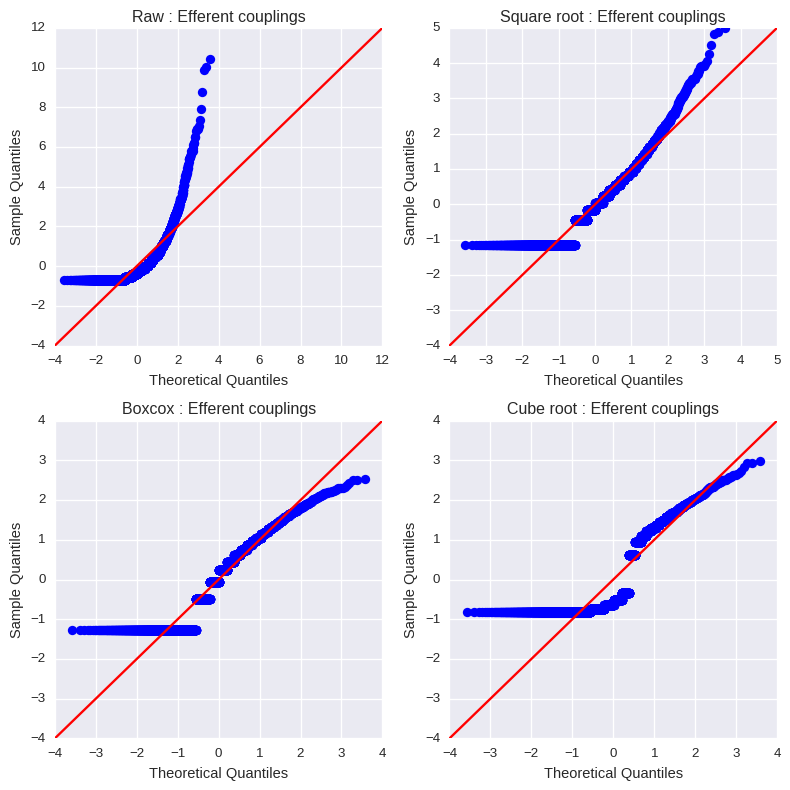

In [48]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.ce, line='45', fit=True, ax=ax)
ax.set_title('Raw : Efferent couplings')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.ce), line='45', fit=True, ax=ax)
ax.set_title('Square root : Efferent couplings')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.ce + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Efferent couplings')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.ce)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Efferent couplings')
plt.tight_layout()

## Use Cube root
full['cbrt_ce'] = np.cbrt(preprocessing.scale(full.ce))

## 14 - Lines of Code
The number of lines of code in the Java binary code of the class under investigation.  

count     5727.000000
mean       290.946918
std        627.960111
min          0.000000
25%         26.000000
50%        102.000000
75%        286.000000
max      13175.000000
Name: loc, dtype: float64

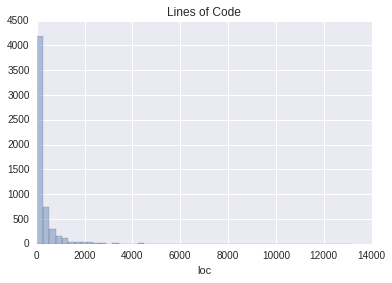

In [49]:
sb.distplot(full['loc'], kde=False)
__ = plt.title('Lines of Code')
full['loc'].describe()

### Transformation and scaling

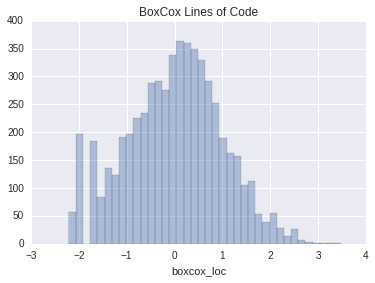

In [50]:
full['boxcox_loc'] = preprocessing.scale(boxcox(full['loc'] + 1) [0])
sb.distplot(full.boxcox_loc, kde=False)
__ = plt.title('BoxCox Lines of Code')

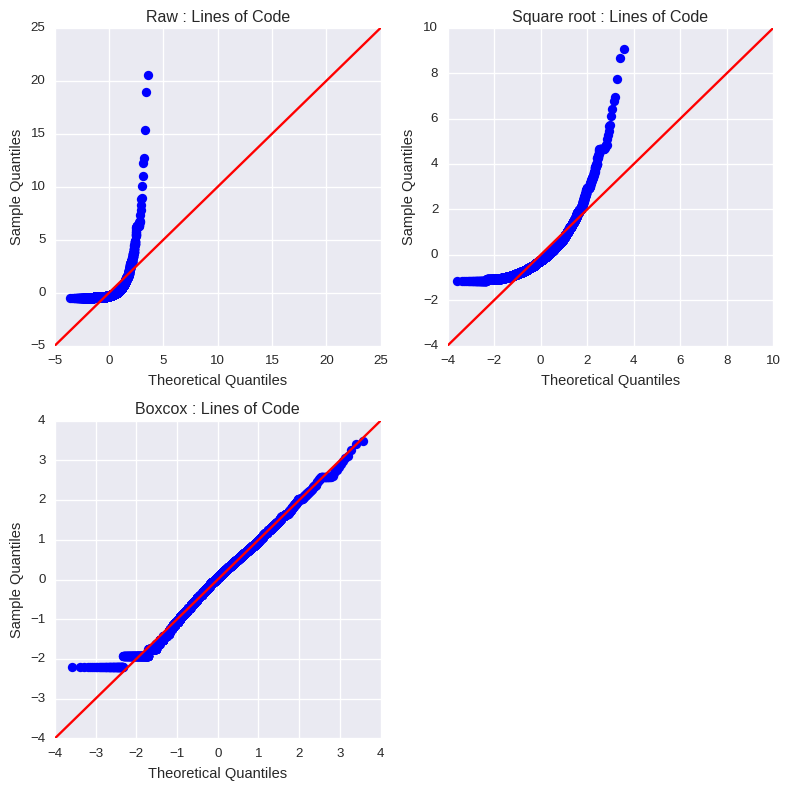

In [51]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full['loc'], line='45', fit=True, ax=ax)
ax.set_title('Raw : Lines of Code')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full['loc']), line='45', fit=True, ax=ax)
ax.set_title('Square root : Lines of Code')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_loc, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Lines of Code')
plt.tight_layout()

## 15 - Data Access Metric
The ratio of the number  of  private (protected) attributes  to  the  total  number  of  attributes declared in the class. 

count    5727.000000
mean        0.510316
std         0.470881
min         0.000000
25%         0.000000
50%         0.571429
75%         1.000000
max         1.000000
Name: dam, dtype: float64

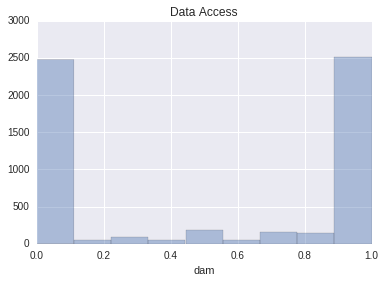

In [52]:
sb.distplot(full.dam, kde=False)
__ = plt.title('Data Access')
full.dam.describe()

### Transformation and scaling

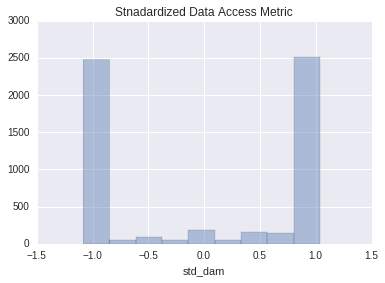

In [53]:
full['std_dam'] = preprocessing.scale(full.dam) 
sb.distplot(full.std_dam, kde=False)
__ = plt.title('Stnadardized Data Access Metric')

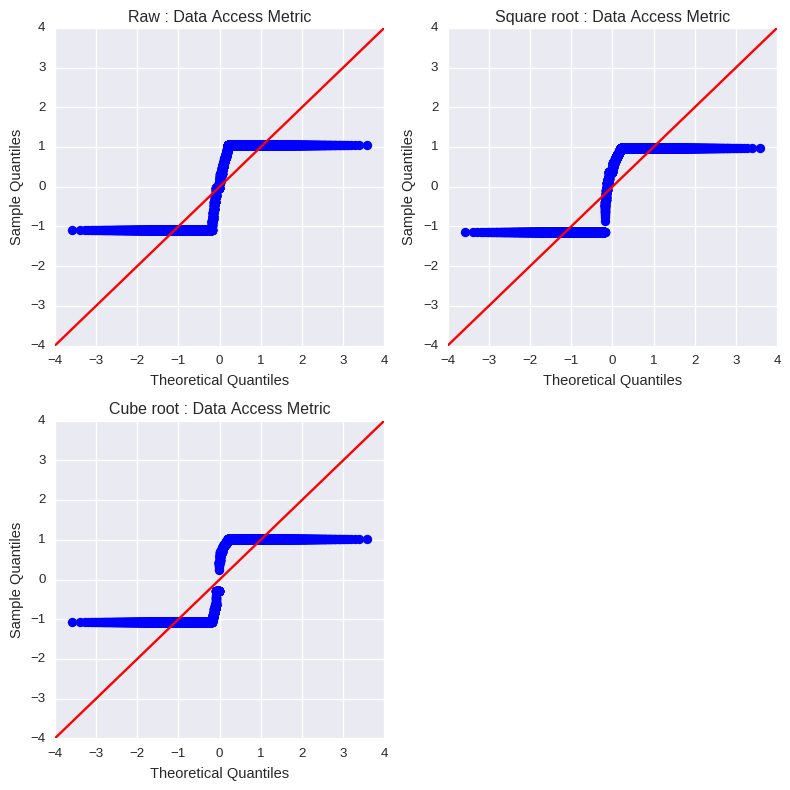

In [54]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.dam, line='45', fit=True, ax=ax)
ax.set_title('Raw : Data Access Metric')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.dam), line='45', fit=True, ax=ax)
ax.set_title('Square root : Data Access Metric')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(full.std_dam), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Data Access Metric')
plt.tight_layout()

## 16 - Cohesion Among Methods of Class
The relatedness among methods of a class based upon the parameter list of the methods. The metric is computed using  
the summation of number of different types of method  parameters in every method divided by a multiplication of   number of different method parameter types in whole class and number of methods. 

count    5727.000000
mean        0.481369
std         0.257319
min         0.000000
25%         0.291667
50%         0.437500
75%         0.666667
max         1.000000
Name: cam, dtype: float64

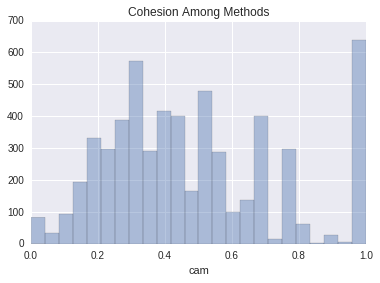

In [55]:
sb.distplot(full.cam, kde=False)
__ = plt.title('Cohesion Among Methods')
full.cam.describe()

### Transformation and scaling

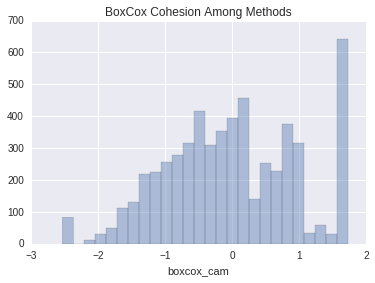

In [56]:
full['boxcox_cam'] = preprocessing.scale(boxcox(full.cam + 1) [0])
sb.distplot(full.boxcox_cam, kde=False)
__ = plt.title('BoxCox Cohesion Among Methods')

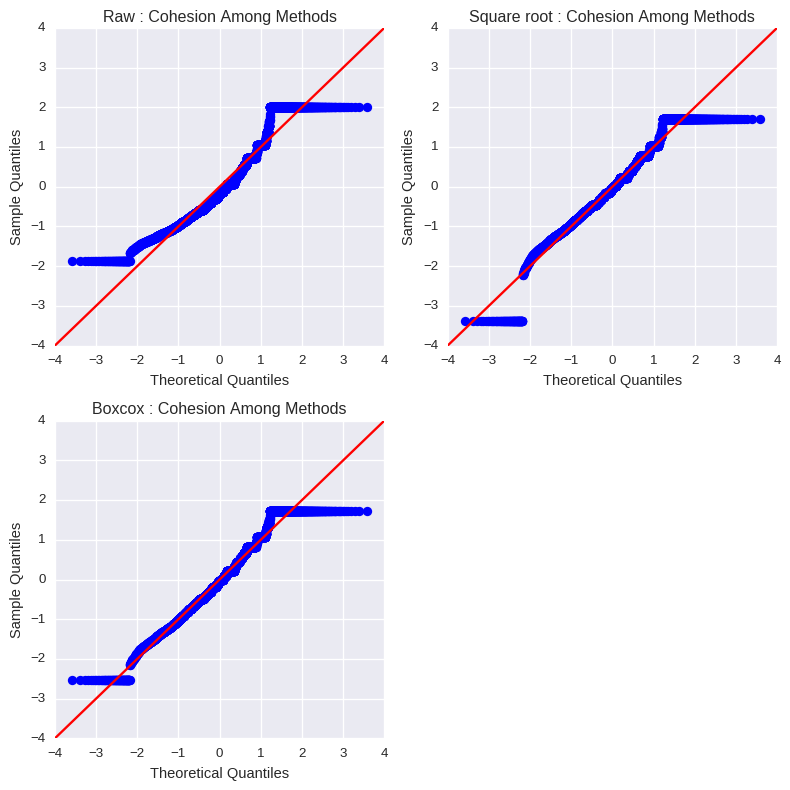

In [57]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.cam, line='45', fit=True, ax=ax)
ax.set_title('Raw : Cohesion Among Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.cam), line='45', fit=True, ax=ax)
ax.set_title('Square root : Cohesion Among Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_cam, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Cohesion Among Methods')
plt.tight_layout()

## 17 - Coupling Between Methods
Measures the total number of new/redefined methods to which all the inherited methods are coupled. There is a coupling when at least one of the conditions given in the IC metric is held

count    5727.000000
mean        1.218090
std         2.898824
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        33.000000
Name: cbm, dtype: float64

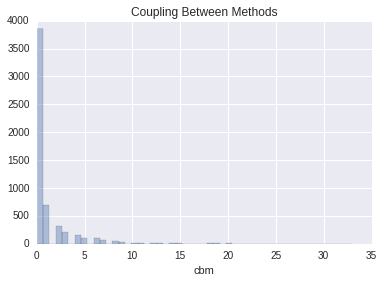

In [58]:
sb.distplot(full.cbm, kde=False)
__ = plt.title('Coupling Between Methods')
full.cbm.describe()

### Transformation and scaling

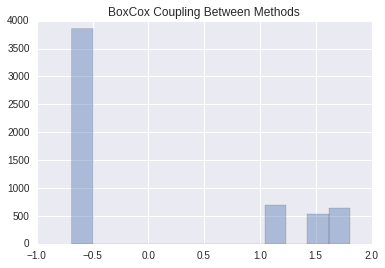

In [59]:
sb.distplot(preprocessing.scale(boxcox(full.cbm + 1) [0]), kde=False)
__ = plt.title('BoxCox Coupling Between Methods')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


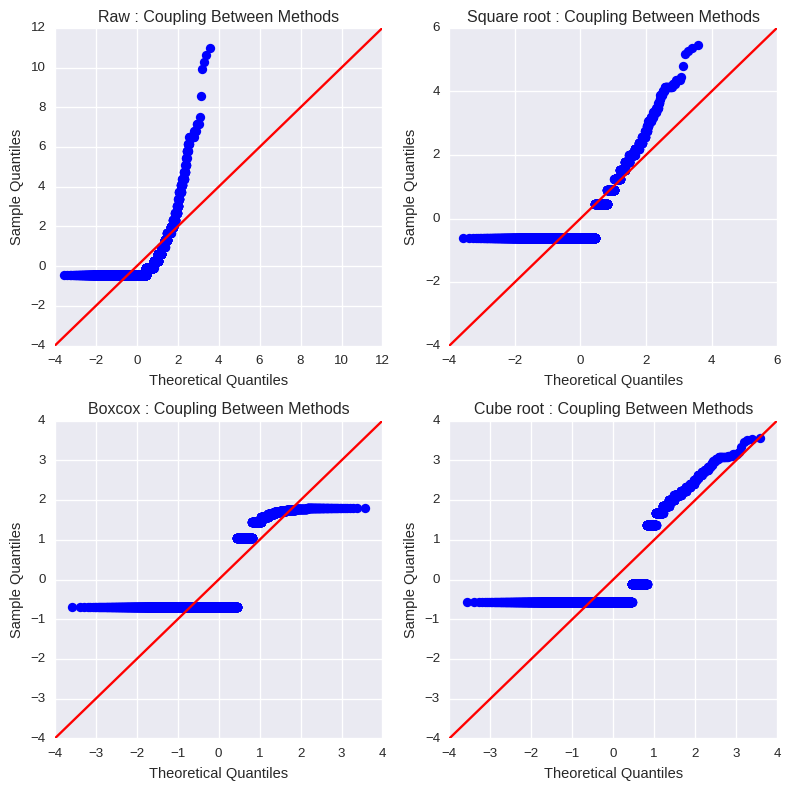

In [62]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.cbm, line='45', fit=True, ax=ax)
ax.set_title('Raw : Coupling Between Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.cbm), line='45', fit=True, ax=ax)
ax.set_title('Square root : Coupling Between Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.cbm + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Coupling Between Methods')
plt.tight_layout()

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.cbm)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Coupling Between Methods')
plt.tight_layout()

# Use cube root
full['cbrt_cbm'] = np.cbrt(preprocessing.scale(full.cbm))

## 18 - Max cyclomatic complexity
The max complexity of all methods comprising a class. It is a quantitative measure of the number of linearly independent paths through a program's source code.

count    5727.000000
mean        4.091147
std         8.253413
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       236.000000
Name: max_cc, dtype: float64

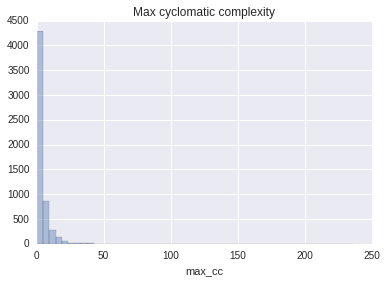

In [63]:
sb.distplot(full.max_cc, kde=False)
__ = plt.title('Max cyclomatic complexity')
full.max_cc.describe()

### Transformation and scaling

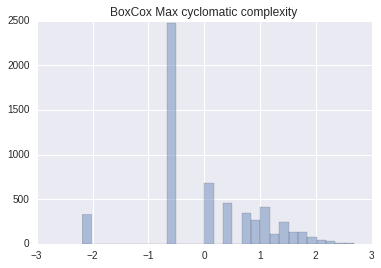

In [64]:
sb.distplot(preprocessing.scale(boxcox(full.max_cc + 1) [0]), kde=False)
__ = plt.title('BoxCox Max cyclomatic complexity')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


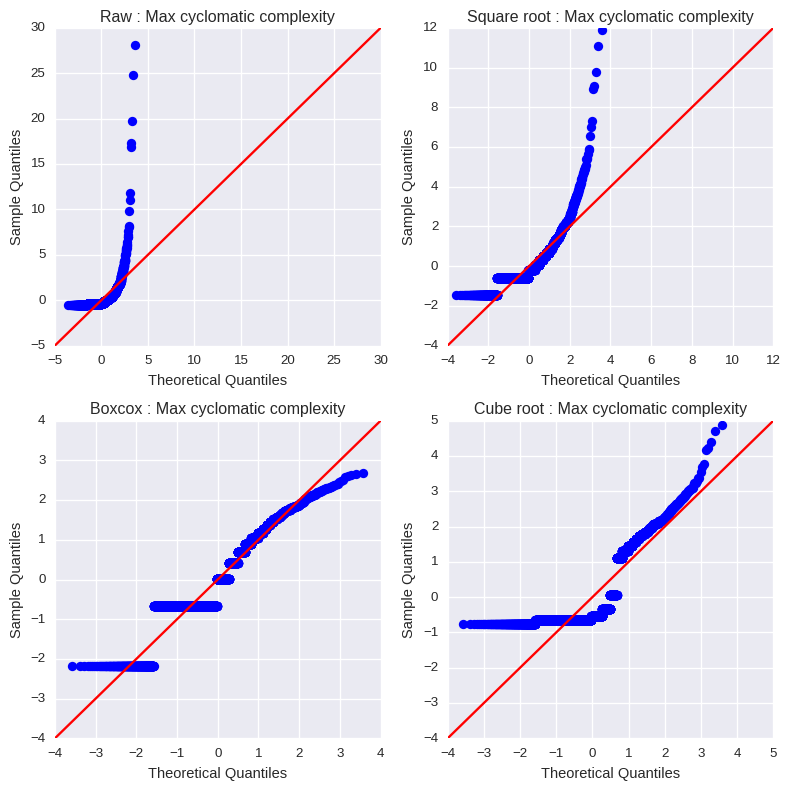

In [65]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.max_cc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Max cyclomatic complexity')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.max_cc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Max cyclomatic complexity')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.max_cc + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Max cyclomatic complexity')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.max_cc)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Max cyclomatic complexity')
plt.tight_layout()

## Use Cube Root
full['cbrt_max_cc'] = np.cbrt(preprocessing.scale(full.max_cc))

## 19 - Average Cyclomatic complexity
The average complexity of all methods comprising a class. It is a quantitative measure of the number of linearly independent paths through a program's source code.

count    5727.000000
mean        1.285957
std         1.223419
min         0.000000
25%         0.750000
50%         1.000000
75%         1.500000
max        28.666700
Name: avg_cc, dtype: float64

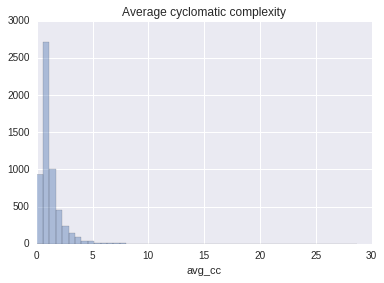

In [66]:
sb.distplot(full.avg_cc, kde=False)
__ = plt.title('Average cyclomatic complexity')
full.avg_cc.describe()

### Transformation and scaling

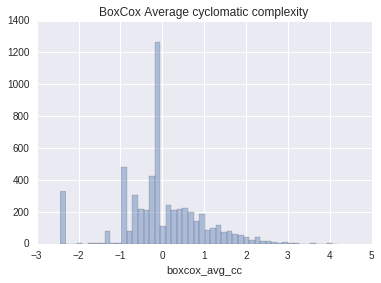

In [67]:
full['boxcox_avg_cc'] = preprocessing.scale(boxcox(full.avg_cc + 1) [0])
sb.distplot(full.boxcox_avg_cc, kde=False)
__ = plt.title('BoxCox Average cyclomatic complexity')

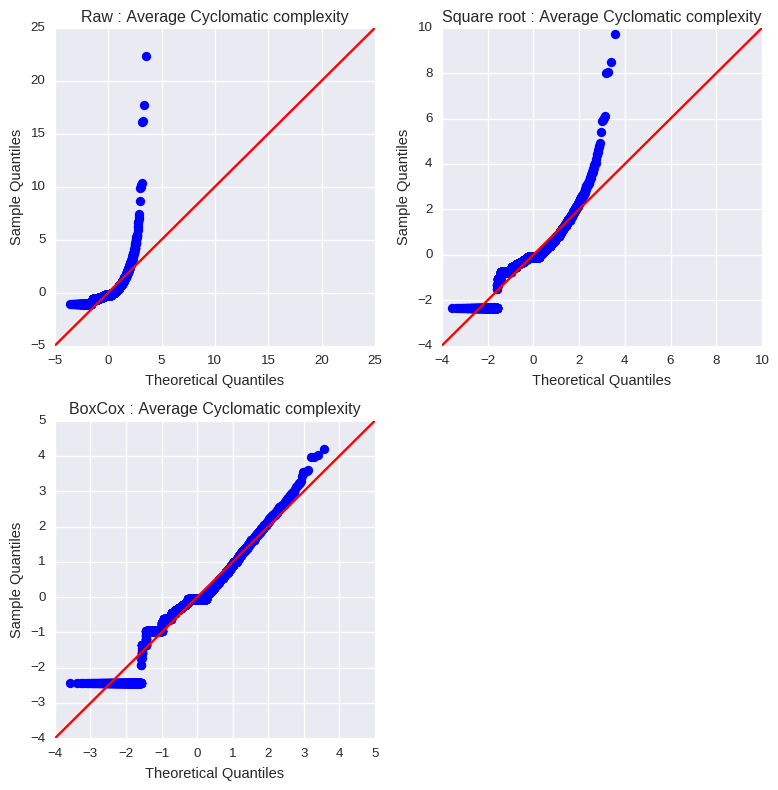

In [68]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.avg_cc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Average Cyclomatic complexity')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.avg_cc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Average Cyclomatic complexity')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_avg_cc, line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Average Cyclomatic complexity')
plt.tight_layout()

## 20 - Measure of Aggregation
The  extent of the part-whole relationship, realized by using attributes. The metric is a count of the number of  class fields whose types are user defined classes. 

count    5727.000000
mean        0.790117
std         1.787024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        25.000000
Name: moa, dtype: float64

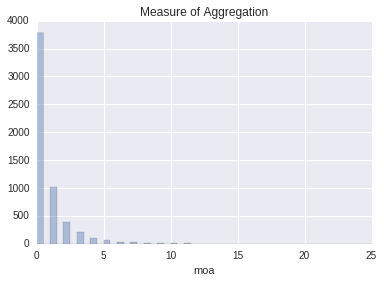

In [69]:
sb.distplot(full.moa, kde=False)
__ = plt.title('Measure of Aggregation')
full.moa.describe()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


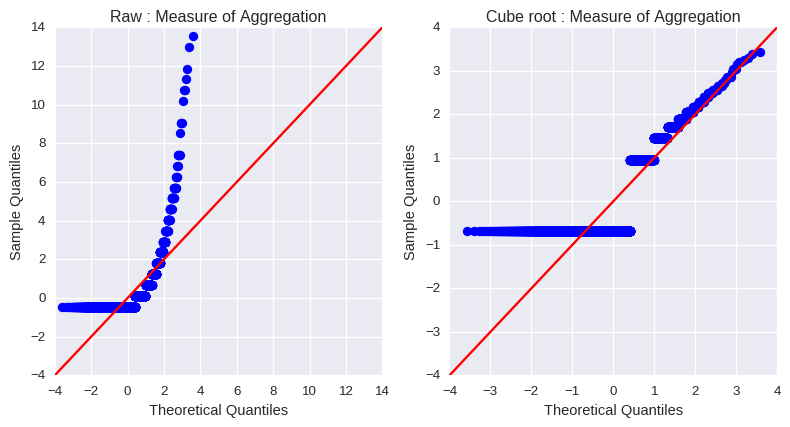

In [72]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.moa, line='45', fit=True, ax=ax)
ax.set_title('Raw : Measure of Aggregation')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.moa)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Measure of Aggregation')
plt.tight_layout()

## Use Cube root
full['cbrt_moa'] = np.cbrt(preprocessing.scale(full.moa))

## Target Variable - Number of Bugs

The number of Bugs in dataset is 2270
0    0
dtype: int64


count    5727.000000
mean        0.876200
std         2.229546
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        62.000000
Name: bug, dtype: float64

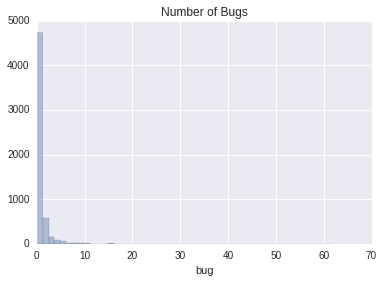

In [103]:
sb.distplot(full.bug, kde=False)
__ = plt.title('Number of Bugs')
print('The number of Bugs in dataset is %d' % (full['bug'] != 0).sum(axis=0))
print(full.bug.mode())
full.bug.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


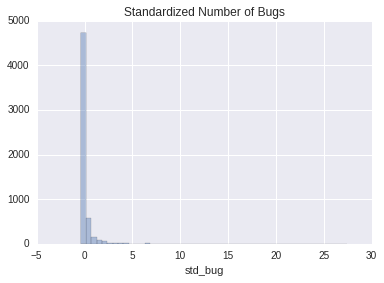

In [92]:
sb.distplot(preprocessing.scale(full.bug), kde=False)
__ = plt.title('Standardized Number of Bugs')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


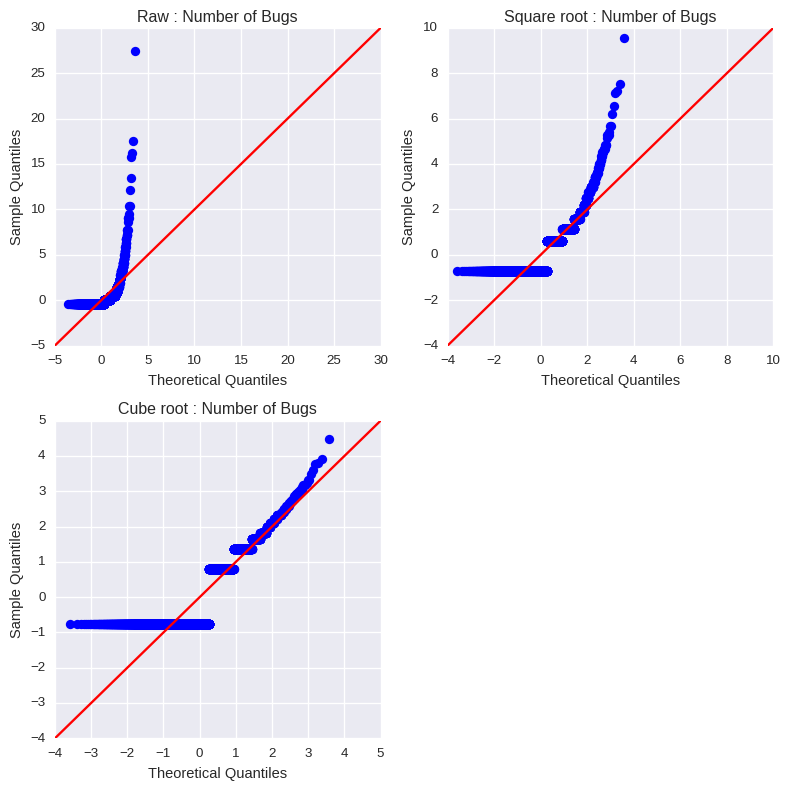

In [78]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.bug, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Bugs')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.bug), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Bugs')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.bug)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Bugs')
plt.tight_layout()


## Use cube root
full['cube_root_bugs'] = np.cbrt(preprocessing.scale(full.bug))

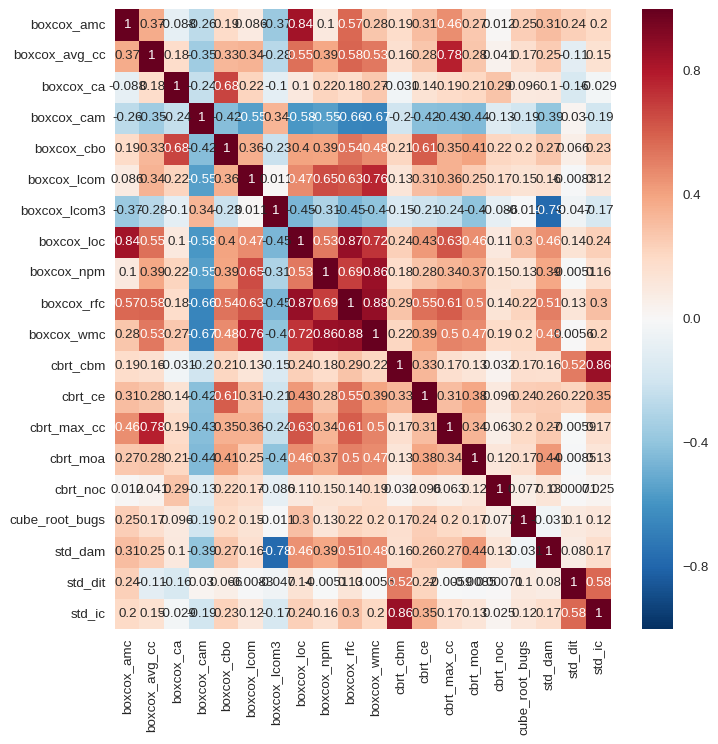

In [79]:
exclude = ['name', 'version', 'wmc', 'dit', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 
           'cam', 'cbm', 'amc', 'max_cc', 'avg_cc', 'bug','ic', 'moa', 'noc', 'dam', 'mfa']

corr = full.ix[:, full.columns.difference(exclude)].corr()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__  = sb.heatmap(corr, annot=True)

In [81]:
# Time to presist transformed data to a CSV file
# Remove the original and keep the transformed and scaled features.
full = full.drop(['name', 'version', 'wmc', 'dit', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 
                  'lcom3', 'loc', 'cam', 'cbm', 'amc', 'max_cc', 'avg_cc', 'bug',
                  'ic', 'moa', 'noc', 'dam', 'mfa'], axis=1)

full.to_csv('/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/std_and_trans_metrics.csv', index=False)